# 1. Importing data and libraries <a class="anchor" id="1"></a>

In [2]:
# Import packages
import pandas as pd
import numpy as np
import datetime as dt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from os import path
from wordcloud import WordCloud

In [3]:
# Import dataset
df_orderproduct = pd.read_csv('datasets/order_products.csv')
df_products = pd.read_csv('datasets/products.csv')
df_orders = pd.read_csv('datasets/orders.csv')
df_department = pd.read_csv('datasets/departments.csv')

# 2. Exploratory Data Analysis <a class="anchor" id="2"></a>

## Orders information

In [4]:
df_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2425083,49125,1,2,18,NaN
1,1944304,162867,1,3,17,NaN
2,1201011,147243,14,0,16,3.0
3,1906860,195275,81,1,11,3.0
4,2766469,58222,3,6,11,6.0


### Frequency of Reorders in a Week

Explore the change of order numbers from Monday to Sunday.

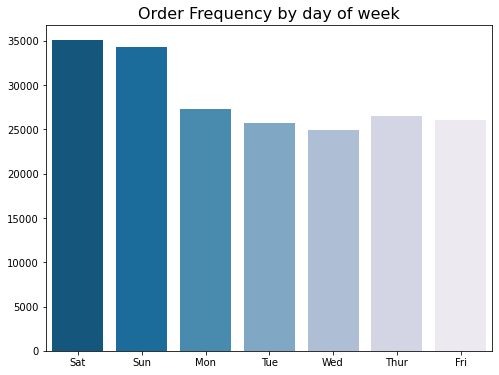

In [5]:
plot_df = df_orders['order_dow'].value_counts().sort_index()
plot_df.index=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']
# show figure:
plt.figure(figsize=(8, 6))
sns.barplot(y = plot_df.values, x = plot_df.index, palette="PuBu_r")
plt.xticks(rotation=0)
plt.title('Order Frequency by day of week', fontsize=16)
plt.show()

### Frequency of Reorders in Hour of Day

Explore how order number changes in the hour of day.

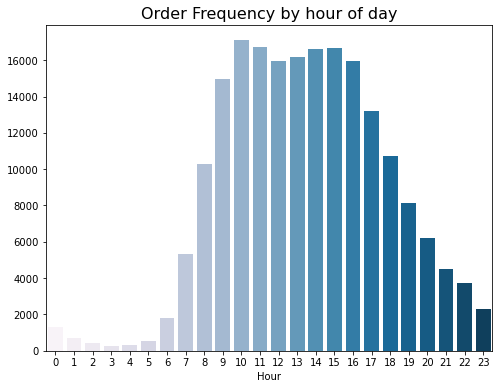

In [6]:
plot_df = df_orders['order_hour_of_day'].value_counts().sort_index()
# show figure:
plt.figure(figsize=(8, 6))
sns.barplot(y = plot_df.values, x = plot_df.index, palette="PuBu")
plt.xticks(rotation=0)
plt.title('Order Frequency by hour of day', fontsize=16)
plt.xlabel('Hour')
plt.show()
#fig.set_dpi(200)

### Frequency of Reorder Interval

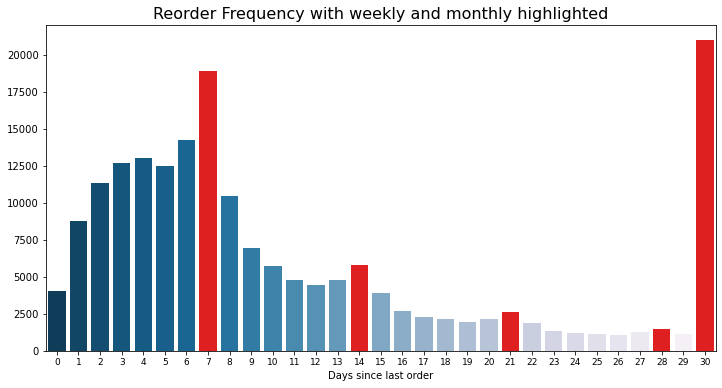

In [7]:
plot_df = df_orders.groupby('days_since_prior_order')['order_id'].agg('count')
color_pl = sns.color_palette(palette="PuBu_r", n_colors=len(plot_df.index))
highlight  = [7,14,21,28,30] 
for i in highlight:
    color_pl[i] = 'red'
# show figure:
plt.figure(figsize=(12, 6))
sns.barplot(y = plot_df.values, x = list(range(len(plot_df.index))), palette=color_pl)
plt.xticks(rotation=0)
plt.title('Reorder Frequency with weekly and monthly highlighted', fontsize=16)
plt.xticks(range(len(plot_df.index)), rotation=0,fontsize=9)
plt.xlabel('Days since last order')
plt.show()
#fig.set_dpi(200)

###  Average Reorder Interval

How often do customers put a new order?

<Figure size 864x432 with 0 Axes>

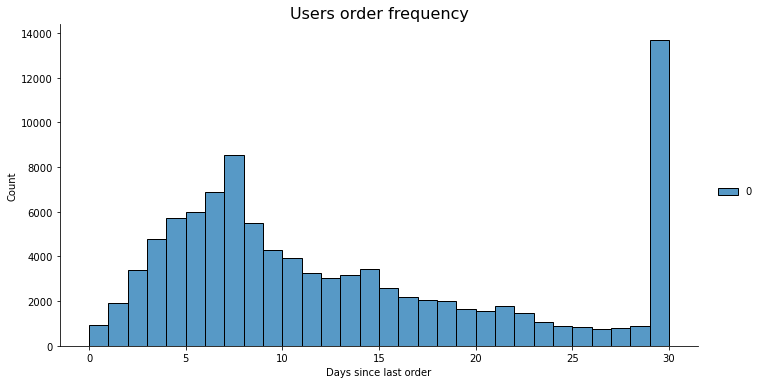

In [8]:
plot_df = df_orders[['user_id','days_since_prior_order']].groupby('user_id').aggregate(np.nanmean)
# show figure:
plt.figure(figsize=(12, 6))
sns.displot(plot_df.values, binwidth=1,aspect=2)
plt.xticks(rotation=0)
plt.title('Users order frequency', fontsize=16)
plt.xlabel('Days since last order')
plt.show()

## Popular Items in Shopping Cart History

In this part, let's see what are the most popular items on customers' order lists.

First take a look at each dataset, and then merge them into one dataframe with all the following included:
* user_id
* order_id
* product_id
* product_name

In [9]:
# orders in prior/train merged with product names
df = pd.merge(df_orderproduct,df_products, how='left', on='product_id')
# Prior orders with user_id, product_id, product_name
df = pd.merge(df,df_orders, how='left', on='order_id')

In [10]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,product_name,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,10,24,1,1,4,fresh fruits,135442,4,6,8,8.0
1,10,83,2,1,4,fresh vegetables,135442,4,6,8,8.0
2,10,16,3,0,4,fresh herbs,135442,4,6,8,8.0
3,10,24,4,1,4,fresh fruits,135442,4,6,8,8.0
4,10,83,5,1,4,fresh vegetables,135442,4,6,8,8.0


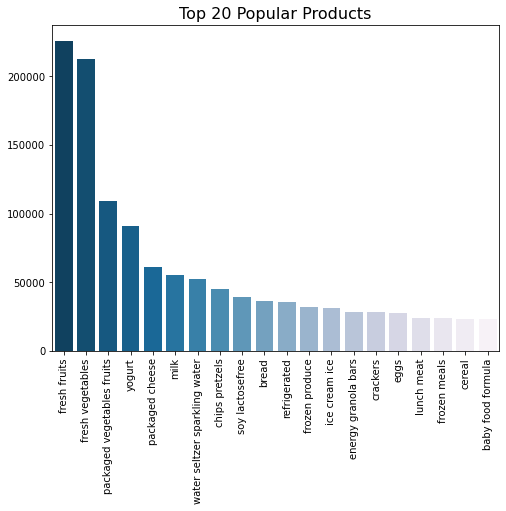

In [11]:
plot_df = df['product_name'].value_counts()[:20]
# show figure:
plt.figure(figsize=(8, 6))
sns.barplot(y = plot_df.values, x = plot_df.index, palette="PuBu_r")
plt.xticks(rotation=90)
plt.title('Top 20 Popular Products', fontsize=16)
plt.show()
#fig.set_dpi(200)

In [12]:
products_tuple_list = [tuple(x) for x in df['product_name'].value_counts().reset_index().values]
dic = {}
for pair in products_tuple_list:
    key = pair[0]
    value = pair[1]
    if key in dic:
        reservedValue = dic[key]
        reservedValue += value 
    else:
        dic[key] = value

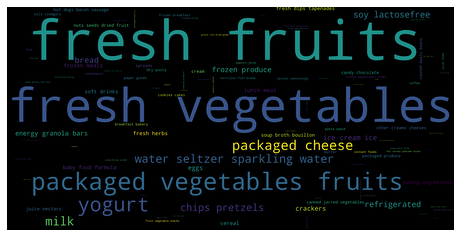

In [13]:
fig = plt.figure(figsize=(8, 6))
wordcloudData = WordCloud(width=4096,height=2048,
                          relative_scaling=1,
                          max_words = 100,
                          max_font_size=500).generate_from_frequencies(frequencies = dic)
plt.imshow(wordcloudData, interpolation='lanczos')
plt.axis("off")
plt.show()